In [1]:
# Импортирование модулей.
# Importing relevant modules.
import numpy as np
from matplotlib import pyplot as mp

In [2]:
# Плотность распределения.
# Probability density function (PDF).
def PDF(x, sigma):
    return ((x/(sigma**2))*np.exp((-1*(x**2))/(2*(sigma**2))))

In [3]:
# Функция распределения (расчёт по формуле).
# Cumulative density function calculated via theoretical formula (CDF).
def CDF_funct(x, sigma):
    return (1-np.exp(-1*(x**2)/(2*(sigma**2))))

In [4]:
# Функция распределения от a до b (расчёт по интегралу МК). Bыборка 10,000.
# CDF in between a and b (calculated with Monte Carlo Integration). Sample size is 10,000.
def CDF_MC(a, b, sigma):
    s = 0
    num = 10000
    for i in range(num):
        x = np.random.uniform(a, b)
        s+=PDF(x, sigma)
    return ((b-a)/num)*s

In [5]:
# График плотности распределения для максимума limit и массива значений σ.
# PDF graph for a given limit and array of σ values.
def PDF_graph(limit, sigma_array):
    
    x = np.linspace(0,limit,limit*100)
    functions = []
    labels = []
    
    for i, sigma in enumerate(sigma_array):
        functions.append(PDF(x, sigma))
        labels.append("σ = "+str(sigma))

    for function, label in zip(functions, labels):
        mp.plot(x, function, label=label)
    
    mp.grid(color = 'k',linewidth = 0.1)
    mp.legend()

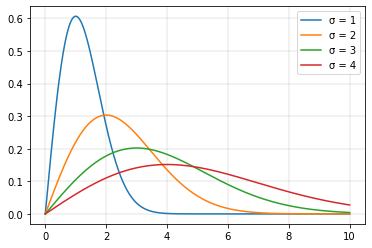

In [6]:
# График плотности распределения для максимума limit=10 и массива значений σ = [1,2,3,4].
# PDF graph for limit = 10 and σ array = [1,2,3,4].
PDF_graph(10, [1, 2, 3, 4])

In [7]:
# График функции распределения (расчёт по формуле) для максимума limit и массива значений σ.
# CDF graph (derived from formula) for a maximum limit and σ array.
def CDF_funct_graph(limit, sigma_array):
    
    x = np.linspace(0,limit,limit*100)
    functions = []
    labels = []
    
    for i, sigma in enumerate(sigma_array):
        functions.append(CDF_funct(x, sigma))
        labels.append("σ = "+str(sigma))

    for function, label in zip(functions, labels):
        mp.plot(x, function, label=label)
    
    mp.grid(color = 'k', linewidth = 0.1)
    mp.legend()
    mp.show()

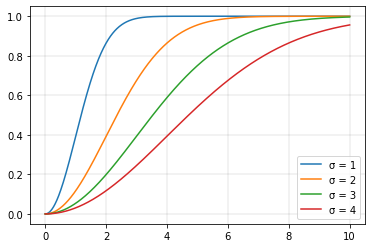

In [8]:
# График функции распределения (расчёт по формуле) для максимума limit=10 и массива значений σ = [1,2,3,4].
# CDF graph (derived from formula) for a maximum limit=10 and σ array = [1, 2, 3, 4].
CDF_funct_graph(10, [1, 2, 3, 4])

In [9]:
# График функции распределения (расчёт по интегралу МК) для диапазона [a,b] и массива значений σ.
# CDF graph (calculated via MC integartion) for a range [a,b] and a σ array.
def CDF_MC_graph(a, b, sigma_array):
   
    x = np.linspace(a, b, (b-a)*5)
    functions = []
    labels = []
    
    for i, sigma in enumerate(sigma_array):
        functions.append([CDF_MC(a, i, sigma) for i in x])
        labels.append("σ = "+str(sigma))
        
    for function, label in zip(functions, labels):
        mp.plot(x, function, label=label)
        
    mp.grid(color = 'k', linewidth = 0.1)
    mp.legend()
    mp.show()

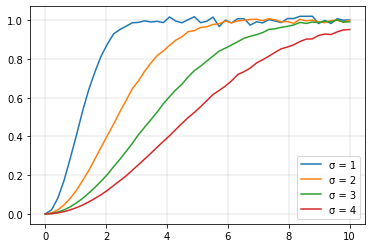

In [10]:
# График функции распределения (расчёт по интегралу МК) для диапазона [0,10], массива значений σ = [1, 2, 3, 4], и выборке 10,000.
# CDF graph (via MC integration) in range [0,10], σ array = [1, 2, 3, 4], and sample size of 10,000.
CDF_MC_graph(0, 10, [1, 2, 3, 4])

In [11]:
# Обратная функция.
# Inverse function.
def inverse_RV(u, sigma):
    return (sigma*np.sqrt(-2*np.log(1-u)))

In [12]:
# График плотности распределения из обратной функции для заданой выборке num.
# PDF graph derived from the inverse function for a given sample size num.
def PDF_inverse(num, sigma):
   
    points = []
    for i in range(num):
        points.append(inverse_RV(np.random.uniform(0, 1), sigma))
    
    x = np.linspace(0,4,40)
    out = [0] * 40
    
    for i in range(len(x)-1):
        out[i] = (np.count_nonzero((points>=x[i]) & (points<=x[i+1]))/num)/(x[i+1]-x[i])
    
    mp.bar(x,out, width = 0.105, align = 'edge')

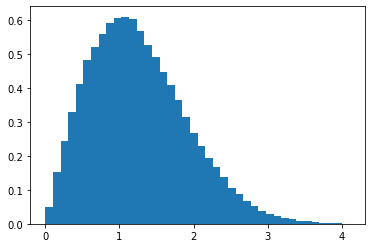

In [13]:
# График плотности распределения из обратной функции для выборке 10,000 и σ = 1.
# PDF graph derived from the inverse function for sample size = 10,000 and σ = 1.
PDF_inverse(100000,1)